<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Exercise (12)</h1>
<h2 style="color:#800080;text-align:center;">Machine Learning Algorithms: RandomForest</h2>

<b>RandomForest</b>

From Moodle, download the Ad Tracking dataset and upload it to your Jupyter directory.  Read DataSet Information to understand the data (https://www.kaggle.com/matleonard/feature-engineering-data).


Create a new Juypter notebook called practex11RF.

<ol>
<li>Identify the target attributes and the objective of the prediction</li>
<li>Apply data Preprocessing</li>
<li>Build a Machine learning algorithms model using RF Algorithm</li>
<li>Evaluate the model</li>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#this will make your plot outputs appear and be stored within the notebook

In [2]:
dt = pd.read_csv('AdTracking.csv')

In [3]:
dt.head(20)

,ip,app,device,os,channel,is_attributed
0,204158,35,1,13,21,1
1,29692,9,1,22,215,1
2,64516,35,1,13,21,1
3,172429,35,1,46,274,1
4,199085,35,1,13,274,1
5,82917,19,0,24,210,1
6,126647,72,1,6,101,1
7,57546,29,1,41,213,1
8,189682,35,1,13,21,1
9,24200,19,88,24,213,1


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ip             1080 non-null   int64
 1   app            1080 non-null   int64
 2   device         1080 non-null   int64
 3   os             1080 non-null   int64
 4   channel        1080 non-null   int64
 5   is_attributed  1080 non-null   int64
dtypes: int64(6)
memory usage: 50.8 KB


In [10]:
print(dt['is_attributed'].value_counts())

is_attributed
0    677
1    403
Name: count, dtype: int64


In [12]:
dt.describe()

,ip,app,device,os,channel,is_attributed
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,100878.033333,20.351852,35.823148,24.694444,226.149074,0.373148
std,59666.920243,27.943016,286.902817,62.515860,117.220241,0.483865
min,763.000000,1.000000,0.000000,0.000000,3.000000,0.000000
25%,50458.750000,8.000000,1.000000,13.000000,135.000000,0.000000
50%,99039.000000,13.000000,1.000000,18.000000,213.000000,0.000000
75%,149435.500000,19.000000,1.000000,21.000000,274.000000,1.000000
max,212767.000000,303.000000,3033.000000,607.000000,497.000000,1.000000


In [29]:
x = dt.iloc[:,:-1].values
y = dt.iloc[:,-1].values


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

# import the random forest classifier from scikit learn
from sklearn.ensemble import RandomForestClassifier
#initialize the RF model using Entropy (Information Gain)
RF = RandomForestClassifier(n_estimators=17, criterion='entropy', max_depth=14)


RF.fit(x_train,y_train)

y_pred=RF.predict(x_test)
y_pred

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
ac*100

[[141  45]
 [ 17  67]]


77.03703703703704

In [85]:
from sklearn.model_selection import cross_val_score

# Example cross-validation
scores = cross_val_score(dt, x_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)


InvalidParameterError: The 'estimator' parameter of check_scoring must be an object implementing 'fit'. Got           ip  app  device  os  channel  is_attributed
0     204158   35       1  13       21              1
1      29692    9       1  22      215              1
2      64516   35       1  13       21              1
3     172429   35       1  46      274              1
4     199085   35       1  13      274              1
...      ...  ...     ...  ..      ...            ...
1075   66015    1       1  12      134              0
1076  183087    2       1  49      364              0
1077  185409   12       1  13      178              0
1078  111312    6       1  31      125              0
1079  161640   15       1  13      379              0

[1080 rows x 6 columns] instead.

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[149,  37],
       [ 36,  48]], dtype=int64)

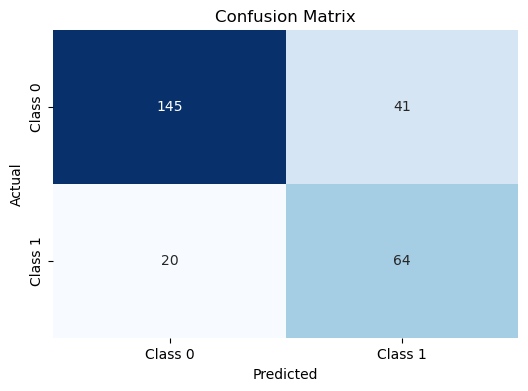

In [56]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       186
           1       0.61      0.76      0.68        84

    accuracy                           0.77       270
   macro avg       0.74      0.77      0.75       270
weighted avg       0.80      0.77      0.78       270



In [58]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.22592592592592592
Mean Squared Error: 0.22592592592592592


In [59]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
ac*100

77.4074074074074